# Practice 4


In [265]:
#Importar librerias
import pandas as pd #manipulacion de bases de datos
import matplotlib.pyplot as plt # Graficas
import seaborn as sns  #Procesamiento estdistico
import numpy as np #arreglos matriciales
from matminer.datasets import load_dataset #bases de datos de materiales 
#Extraccion de caracteristicas
from sklearn.feature_selection import mutual_info_classif 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#Reduccion de dimensionalidad PCA
from sklearn.preprocessing import StandardScaler #Estandarizacion
from sklearn.decomposition import PCA # aplicar PCA
#Cross validation 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#Confusion matrix
from sklearn.metrics import (confusion_matrix, accuracy_score)
#Aprendices debiles
from sklearn import svm #Suport vector machine
from sklearn import tree #Decicion trees
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier#Nearest Neighbors
# Metricas
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
#Meta ensambles
from sklearn.ensemble import GradientBoostingClassifier #Gradient Boosting Classifier
from sklearn.ensemble import BaggingClassifier #Bagging Classifier
#Libraries for stacking
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.ensemble import AdaBoostClassifier #Ada Boost
# Redes neuronales
from sklearn.neural_network import MLPClassifier 

## Preprocesamiento de datos

In [2]:
#Cargamos la base de datos
df = load_dataset('jarvis_dft_2d') 
df

,epsilon_x opt,epsilon_y opt,epsilon_z opt,exfoliation_en,structure,e_form,structure initial,jid,gap tbmbj,epsilon_x tbmbj,epsilon_y tbmbj,epsilon_z tbmbj,mpid,gap opt,composition
0,10.3295,10.3295,7.0367,63.593833,"[[1.49323139 3.32688406 7.26257785] Hf, [3.326...",-0.624,"[[1.49180494 3.32370494 7.25734791] Hf, [3.323...",JVASP-19990,NaN,NaN,NaN,NaN,mp-13963,0.0341,"(Hf, Si, Te)"
1,4.7325,5.6477,2.6267,134.863750,"[[1.85068084 4.37698238 6.9301577 ] As, [0. ...",0.160,"[[1.85325003 4.36491291 6.93222312] As, [0. ...",JVASP-31349,NaN,NaN,NaN,NaN,mp-158,0.7467,(As)
2,6.4357,5.2377,3.0070,43.114667,"[[ 0. 2.0213325 11.97279555] Ti, [ 1...",-2.231,"[[ 0. 2.0239455 11.96404455] Ti, [ 1...",JVASP-27890,NaN,NaN,NaN,NaN,mp-23002,0.0023,"(Ti, Br, O)"
3,9.3915,9.3915,4.2669,240.715488,"[[2.39882726 2.39882726 2.53701553] In, [0.054...",0.240,"[[2.53701507 2.53701507 2.53701604] In, [0.057...",JVASP-31353,NaN,NaN,NaN,NaN,mp-23313,0.0266,"(In, Bi)"
4,2.7367,2.7367,2.0162,67.442833,[[-1.83484554e-06 1.73300105e+00 2.61675943e...,-2.245,[[-2.000000e-06 1.731207e+00 2.616762e+00] N...,JVASP-31356,NaN,NaN,NaN,NaN,mp-25214,0.0484,"(Nb, O)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,3.0474,3.0474,1.7594,26.426545,"[[ 2.38592362 1.37751086 13.178104 ] Co, [-2...",0.082,"[[ 2.45512079 1.41746192 13.178104 ] Co, [-2...",JVASP-27971,NaN,NaN,NaN,NaN,mp-31621,3.3695,"(Co, Cl, O)"
632,2.2460,2.2460,2.0120,43.574286,"[[0. 0. 6.02219863] Br, [0. ...",-2.057,"[[0. 0. 6.02933012] Br, [0. 0....",JVASP-60396,NaN,NaN,NaN,NaN,mp-545481,0.1178,"(Br, Ca, Cu, O)"
633,3.3495,2.9913,2.9485,88.808659,"[[2.74646086 0.06822876 1.46596737] Se, [6.324...",-0.062,"[[2.70908813 0.26207305 1.51813135] Se, [6.325...",JVASP-60439,NaN,NaN,NaN,NaN,mp-567437,1.3010,"(Se, Cl, Pd)"
634,2.2354,2.2346,2.1312,132.265250,"[[6.79056646 2.04327631 3.37729406] I, [2.0440...",-0.101,"[[6.94753133 2.21941967 3.3769579 ] I, [2.2194...",JVASP-60440,2.1636,2.1444,2.1421,2.0013,mp-567471,1.8036,"(I, Hg)"


In [3]:
#Seleccionamos solo las columnas de interes de la base de datos
df2=df.iloc[0:635,[0,1,2,3,5,13]]
df3=df2.dropna() #quitamos aquellas instancias que tengan valores nulos
features=df3.iloc[0:518,[0,1,2,3,5]] #seleccionamos las variables de caracteristicas
target=df3.iloc[0:518,[4]] #seleccionamos la variable objetivo

In [4]:
features

,epsilon_x opt,epsilon_y opt,epsilon_z opt,exfoliation_en,gap opt
0,10.3295,10.3295,7.0367,63.593833,0.0341
1,4.7325,5.6477,2.6267,134.863750,0.7467
2,6.4357,5.2377,3.0070,43.114667,0.0023
3,9.3915,9.3915,4.2669,240.715488,0.0266
4,2.7367,2.7367,2.0162,67.442833,0.0484
...,...,...,...,...,...
630,23.6564,18.6196,4.5643,76.492688,0.0128
631,3.0474,3.0474,1.7594,26.426545,3.3695
632,2.2460,2.2460,2.0120,43.574286,0.1178
633,3.3495,2.9913,2.9485,88.808659,1.3010


In [5]:
target

,e_form
0,-0.624
1,0.160
2,-2.231
3,0.240
4,-2.245
...,...
630,-0.221
631,0.082
632,-2.057
633,-0.062


In [88]:
#Categorizacion de la variable objetivo, variable real a variable categorica
objetivo=[]
emin=-0.5 #Umbral de energia de formacion para definir si una estructura es estable termodinamicamente
ef=target.to_numpy()
for e in ef:
    if e>emin:
        objetivo.append(0) #No estable = 0
    else:
        objetivo.append(1) #Estable = 1
target2 = pd.DataFrame(objetivo, columns=['e_form'])

In [89]:
target2

,e_form
0,1
1,0
2,1
3,0
4,1
...,...
513,0
514,0
515,1
516,0


In [90]:
#Vamos a contar cuantas estructuras son estables y no estables termodinamicamente
#a = numero de estructuras estables
#b=numero de estrucuras
#c=b-a=numero de estructuras no estables
a,b  = target2.e_form.sum(), target2.e_form.size
c=b-a
print('Numero total de sistemas 2D:',b)
print('Numero de sistemas estables:', a)
print('Numero de sistemas no estables', c)

Numero total de sistemas 2D: 518
Numero de sistemas estables: 311
Numero de sistemas no estables 207


## Análisis exploratorio 

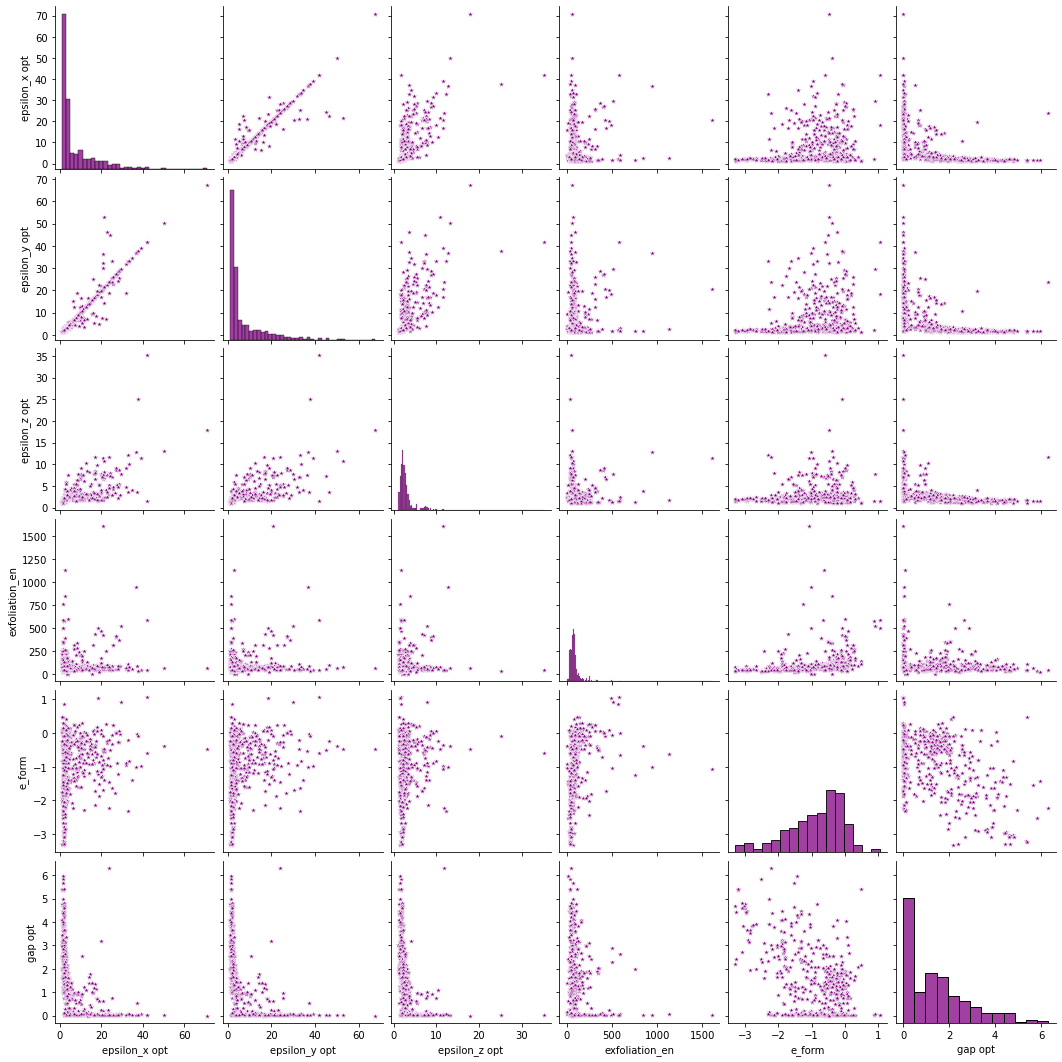

In [9]:
#Graficas del data set original
sns.pairplot(df3,plot_kws={'color':'purple','marker':'*'},diag_kws={'color':'purple'})

In [10]:
#Descripcion estadistica basica de las variables de caracteristicas
features.describe()

,epsilon_x opt,epsilon_y opt,epsilon_z opt,exfoliation_en,gap opt
count,518.000000,518.000000,518.000000,518.000000,518.000000
mean,7.577931,7.567670,3.131387,110.062777,1.404273
std,8.726988,9.195616,2.718814,130.696357,1.379558
min,1.061400,1.183400,1.059500,0.026500,0.000100
25%,2.146550,2.182575,1.894975,57.813031,0.068650
50%,3.438750,3.407900,2.380350,79.592333,1.220600
75%,10.171400,9.346000,3.103875,100.479498,2.090475
max,70.889200,67.562000,35.121800,1604.038286,6.309900


In [8]:
target.describe() #Descripcion estadistica basica de la variable objetivo 

,e_form
count,518.000000
mean,-0.893069
std,0.837383
min,-3.316000
25%,-1.391500
50%,-0.688000
75%,-0.258250
max,1.068000


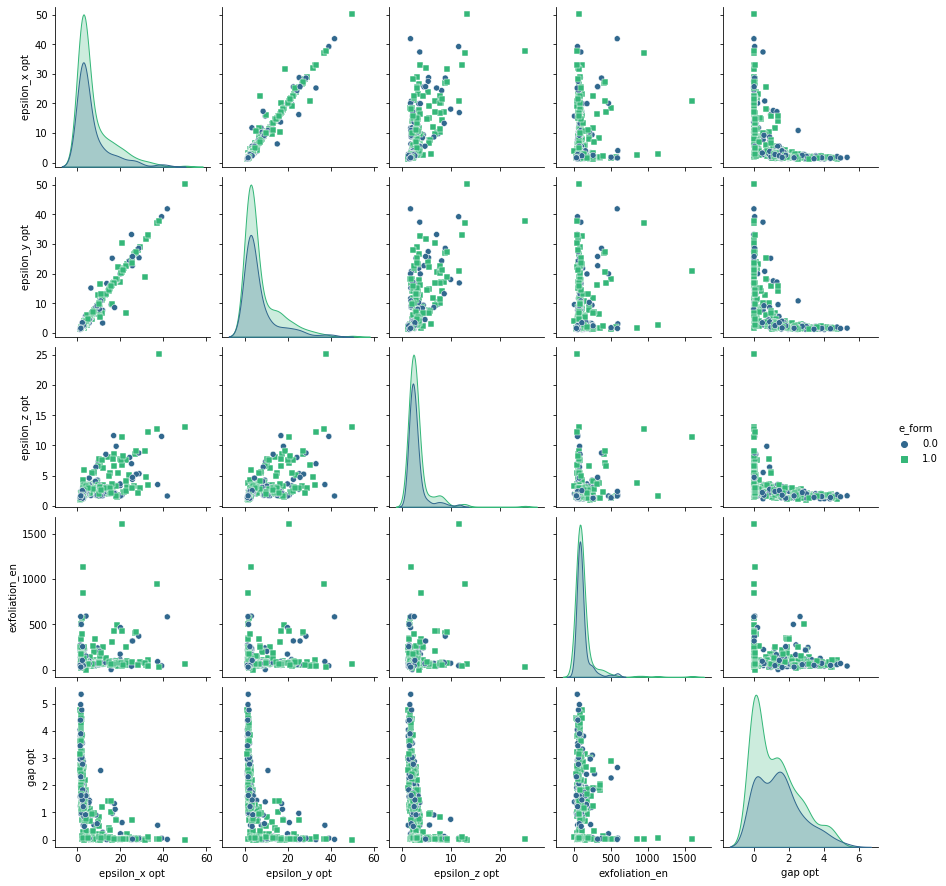

In [91]:
z=pd.concat([target2,features], axis=1)
w=z.dropna()
w
sns.pairplot(w,hue='e_form',markers=['o', 's'],palette='viridis')

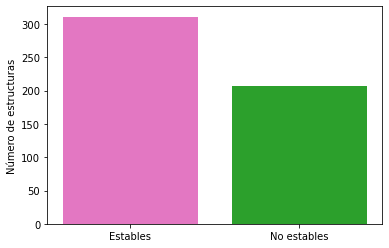

In [92]:
bar_color = ['tab:pink', 'tab:green']
plt.bar([1,2], [a, b-a],color=bar_color)
plt.ylabel('Número de estructuras')
plt.xticks([1,2],['Estables','No estables'])
plt.show()

## Features extraction

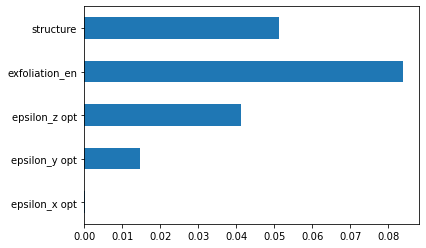

In [20]:
X_new = mutual_info_classif(features, target2.values.ravel())
feat_imp = pd.Series(X_new, df.columns[0:len(df.columns)-10])
feat_imp.plot(kind='barh')
plt.show()

<AxesSubplot:>

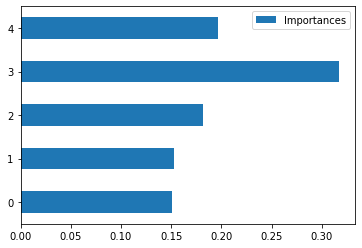

In [19]:
model = RandomForestClassifier(n_estimators=340)
model.fit(features,target2.values.ravel())
importances = model.feature_importances_

feat_df = pd.DataFrame({"Features": pd.DataFrame(features).columns, "Importances": importances})
feat_df.set_index('Importances')
feat_df.plot.barh()

<AxesSubplot:>

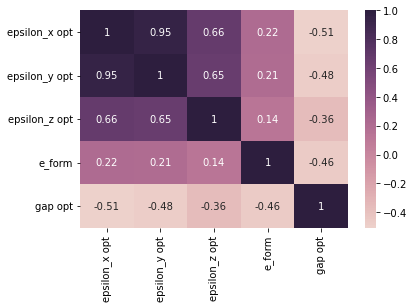

In [22]:
cor = features.corr()
sns.heatmap(cor, annot = True,cmap=sns.cubehelix_palette(as_cmap=True))

In [201]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestClassifier

efs = ExhaustiveFeatureSelector(RandomForestClassifier(),
                               min_features=1,
                                max_features=5,
                               scoring='accuracy',
                               cv=5)
efs = efs.fit(features, target2.values.ravel())
print('Mejor subconjunto (correspondientes a los indices):', efs.best_idx_)
print('Mejor subconjunto (correspondiente a los nombres):', efs.best_feature_names_)

Features: 31/31

Mejor subconjunto (correspondientes a los indices): (0, 3, 4)
Mejor subconjunto (correspondiente a los nombres): ('epsilon_x opt', 'exfoliation_en', 'gap opt')


## Reduccion de dimensionalidad

In [10]:
scalar = StandardScaler() 
scaled_data=pd.DataFrame(scalar.fit_transform(features))
scaled_data.head()

,0,1,2,3,4
0,0.315599,0.300632,1.437791,-0.355893,-0.994157
1,-0.326365,-0.208994,-0.185807,0.189944,-0.477115
2,-0.131011,-0.253623,-0.045795,-0.512737,-1.017230
3,0.208012,0.198529,0.418054,1.000632,-0.999599
4,-0.555279,-0.525864,-0.410571,-0.326414,-0.983781


In [11]:
#Creando modelo PCA
#Definiendo numero de componentes
pca=PCA(n_components=3)
pca.fit(scaled_data) #Aplicando al modelo
data_pca=pca.transform(scaled_data)
data_pca=pd.DataFrame(data_pca,columns=['PC1','PC2','PC3']) #Pasando datos a un dataframe

In [17]:
data_pca

,PC1,PC2,PC3
0,1.368320,-0.428161,-0.341713
1,-0.177275,0.330563,-0.521333
2,0.110149,-0.299133,-1.079526
3,0.919162,1.035349,-0.461326
4,-0.441073,-0.013346,-1.237671
...,...,...,...
513,2.307790,-0.444742,-0.345185
514,-1.424732,-0.683054,0.800431
515,-0.541697,-0.188045,-1.247616
516,-0.564607,-0.045051,-0.260208


<AxesSubplot:>

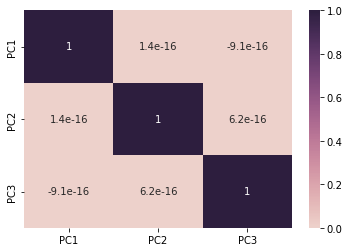

In [19]:
sns.heatmap(data_pca.corr(),annot = True,cmap=sns.cubehelix_palette(as_cmap=True))

## Validación 

In [111]:
# Validacion para el dataset sin PCA
x_train, x_test, y_train, y_test = train_test_split(features, target2, test_size=0.15, random_state=1)
#Validacion para el dataset con PCA
x_trainPCA, x_testPCA, y_trainPCA, y_testPCA = train_test_split(data_pca, target2, test_size=0.15, random_state=1)

In [113]:
#Función para obtener matriz de confusiion y metricas
#Metricas
def metricas(y_t,y_p):
    CM=confusion_matrix(y_t, y_p)
    #true negative
    TN=CM[0,0]
    #false negative
    FN=CM[1,0]
    #true positive
    TP=CM[1,1]
    #false positive
    FP=CM[0,1]
    #Sensitivity
    SEN=TP/(TP+FN)
    #Specificity
    SPE=TN/TN+FP
    #accuracy
    accu=accuracy_score(y_t,y_p)
    #f1 score
    f1=f1_score(y_t,y_p)
    return CM, accu, f1, SEN, SPE

## Buscando el mejor modelo de predicción
Para tratar de clasificar si el material es estable o no vamos a usar modelos de predicción aprendizaje máquina.
Los modelos que se van a aplicar a la base de datos a la aque se aplicó PCA y a la que no se le aplicó, son:

1. Aprendices débiles.
2. Meta ensables.
3. Red neuronal simple.

Para evaluar cual modelo predice mejor si es 1 (estable) o 0 (no estable) se usarán las métrias de la matriz de confusión. F1 score y el accuracy.

## Aprendices debiles

### Maquina de soporte vectorial

In [159]:
SVM = svm.SVC(kernel='rbf', C=1)#Creando el modelo

In [160]:
#Validacion simple datos originales
SVM.fit(x_train, y_train.values.ravel())
y_predictionSVM=SVM.predict(x_test)

In [161]:
#Metricas
mcSVM,accSVM,f1SVM,senSVM,speSVM=metricas(y_test,y_predictionSVM)
print('Matriz de confusión:',mcSVM)
print('Accuracy:',accSVM)
print('F1 score:',f1SVM)
print('Sensividad:',senSVM)
print('Especifidad:',speSVM)

Matriz de confusión: [[ 9 20]
 [ 4 45]]
Accuracy: 0.6923076923076923
F1 score: 0.7894736842105262
Sensividad: 0.9183673469387755
Especifidad: 21.0


In [164]:
#Datos originales
#Entrenamiento del modelo con validación cruzada
y_predictionCV = cross_val_predict(SVM, features, target2.values.ravel(), cv=10)

In [165]:
#Metricas
mcCV,accCV,f1CV,senCV,speCV=metricas(target2,y_predictionCV)
print('Matriz de confusión:',mcCV)
print('Accuracy:',accCV)
print('F1 score:',f1CV)
print('Sensividad:',senCV)
print('Especifidad:',speCV)

Matriz de confusión: [[ 67 140]
 [ 25 286]]
Accuracy: 0.6814671814671814
F1 score: 0.7761194029850746
Sensividad: 0.9196141479099679
Especifidad: 141.0


In [174]:
#Datos con PCA validacion simple
SVM.fit(x_trainPCA, y_trainPCA.values.ravel())
y_predictionPCA=SVM.predict(x_testPCA)
#Metricas
mcSVMPCA,accSVMPCA,f1SVMPCA,senSVMPCA,speSVMPCA=metricas(y_testPCA,y_predictionPCA)
print('Matriz de confusión con PCA:',mcSVMPCA)
print('Accuracy con PCA:',accSVMPCA)
print('F1 score con PCA:',f1SVMPCA)
print('Sensividad con PCA:',senSVMPCA)
print('Especifidad con PCA:',speSVMPCA)

Matriz de confusión con PCA: [[10 19]
 [ 4 45]]
Accuracy con PCA: 0.7051282051282052
F1 score con PCA: 0.7964601769911506
Sensividad con PCA: 0.9183673469387755
Especifidad con PCA: 20.0


In [173]:
#Datos con PCA
#Entrenamiento del modelo con validación cruzada
y_predictionCVPCA = cross_val_predict(SVM, data_pca, target2.values.ravel(), cv=10)
#Metricas
mcCVPCA,accCVPCA,f1CVPCA,senCVPCA,speCVPCA=metricas(target2,y_predictionCVPCA)
print('Matriz de confusión con PCA:',mcCVPCA)
print('Accuracy con PCA:',accCVPCA)
print('F1 score con PCA:',f1CVPCA)
print('Sensividad con PCA:',senCVPCA)
print('Especifidad con PCA:',speCVPCA)

Matriz de confusión con PCA: [[ 95 112]
 [ 35 276]]
Accuracy con PCA: 0.7162162162162162
F1 score con PCA: 0.7896995708154507
Sensividad con PCA: 0.887459807073955
Especifidad con PCA: 113.0


| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| Máquina de soporte vectorial (SVM), kernel=rbf y datos originales | 0.69 |  0.78 | 0.91 | 21 |
| Valdación cruzada (CV), SVM, kernel=rbf y datos originales | 0.68 | 0.77 | 0.91 | 141 |
| SVM, kernel=rbf y datos con PCA | 0.70 |  0.79 | 0.91 | 20 | 
| CV, SVM, kernel=rbf y datos con PCA| 0.71 |  0.79 | 0.88 | 113 |

### Gaussian Naive Bayes

In [178]:
gnb = GaussianNB() #Creamos el modelo

In [179]:
gnb.fit(x_train, y_train.values.ravel())
y_predictionGNB=gnb.predict(x_test)
#Metricas
mcGNB,accGNB,f1GNB,senGNB,speGNB=metricas(y_test,y_predictionGNB)
print('Matriz de confusión:',mcGNB)
print('Accuracy:',accGNB)
print('F1 score:',f1GNB)
print('Sensividad:',senGNB)
print('Especifidad:',speGNB)

Matriz de confusión: [[ 5 24]
 [ 5 44]]
Accuracy: 0.6282051282051282
F1 score: 0.7521367521367522
Sensividad: 0.8979591836734694
Especifidad: 25.0


In [181]:
#Datos originales con validacion cruzada
#Entrenamiento del modelo con validación cruzada
y_predictionCVGNB = cross_val_predict(gnb, features, target2.values.ravel(), cv=10)
#Metricas
mcCVGNB,accCVGNB,f1CVGNB,senCVGNB,speCVGNB=metricas(target2,y_predictionCVGNB)
print('Matriz de confusión:',mcCVGNB)
print('Accuracy:',accCVGNB)
print('F1 score:',f1CVGNB)
print('Sensividad:',senCVGNB)
print('Especifidad:',speCVGNB)

Matriz de confusión: [[ 55 152]
 [ 59 252]]
Accuracy: 0.5926640926640927
F1 score: 0.7048951048951049
Sensividad: 0.8102893890675241
Especifidad: 153.0


In [182]:
#Datos con PCA validacion simple
gnb.fit(x_trainPCA, y_trainPCA.values.ravel())
y_predictionPCAGNB=gnb.predict(x_testPCA)
#Metricas
mcPCAGNB,accPCAGNB,f1PCAGNB,senPCAGNB,spePCAGNB=metricas(y_testPCA,y_predictionPCAGNB)
print('Matriz de confusión con PCA:',mcPCAGNB)
print('Accuracy con PCA:',accPCAGNB)
print('F1 score con PCA:',f1PCAGNB)
print('Sensividad con PCA:',senPCAGNB)
print('Especifidad con PCA:',spePCAGNB)

Matriz de confusión con PCA: [[ 6 23]
 [ 6 43]]
Accuracy con PCA: 0.6282051282051282
F1 score con PCA: 0.7478260869565216
Sensividad con PCA: 0.8775510204081632
Especifidad con PCA: 24.0


In [185]:
#Datos con PCA
#Entrenamiento del modelo con validación cruzada
y_predictionCVPCAGNB = cross_val_predict(gnb, data_pca, target2.values.ravel(), cv=10)
#metricas
mcCVPCAGNB,accCVPCAGNB,f1CVPCAGNB,senCVPCAGNB,speCVPCAGNB=metricas(target2,y_predictionCVPCAGNB)
print('Matriz de confusión con PCA:',mcCVPCAGNB)
print('Accuracy con PCA:',accCVPCAGNB)
print('F1 score con PCA:',f1CVPCAGNB)
print('Sensividad con PCA:',senCVPCAGNB)
print('Especifidad con PCA:',speCVPCAGNB)

Matriz de confusión con PCA: [[ 79 128]
 [ 55 256]]
Accuracy con PCA: 0.6467181467181468
F1 score con PCA: 0.7366906474820143
Sensividad con PCA: 0.8231511254019293
Especifidad con PCA: 129.0


| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| Gaussian Naive Bayes (GNB) y datos originales | 0.62 |  0.85 | 0.89 | 25 |
| Valdación cruzada (CV), GNB y datos originales | 0.59 | 0.70 | 0.81 | 153 |
| GNB y datos con PCA | 0.62 |  0.74 | 0.87 | 24 | 
| CV, GNB y datos con PCA| 0.64 |  0.73 | 0.82 | 129 |

### Arboles de decisión

In [192]:
DTree = tree.DecisionTreeClassifier() #creando el modelo

In [193]:
#Datos originales validacion simple
DTree.fit(x_train, y_train.values.ravel())
y_predictionDTree=DTree.predict(x_test)
#Metricas
mcDTree,accDTree,f1DTree,senDTree,speDTree=metricas(y_test,y_predictionDTree)
print('Matriz de confusión:',mcDTree)
print('Accuracy:',accDTree)
print('F1 score:',f1DTree)
print('Sensividad:',senDTree)
print('Especifidad:',speDTree)

Matriz de confusión: [[19 10]
 [10 39]]
Accuracy: 0.7435897435897436
F1 score: 0.7959183673469388
Sensividad: 0.7959183673469388
Especifidad: 11.0


In [194]:
#Datos originales con validacion cruzada
#Entrenamiento del modelo con validación cruzada
y_predictionCVDTree = cross_val_predict(DTree, features, target2.values.ravel(), cv=10)
#Metricas
mcCVDTree,accCVDTree,f1CVDTree,senCVDTree,speCVDTree=metricas(target2,y_predictionCVDTree)
print('Matriz de confusión:',mcCVDTree)
print('Accuracy:',accCVDTree)
print('F1 score:',f1CVDTree)
print('Sensividad:',senCVDTree)
print('Especifidad:',speCVDTree)

Matriz de confusión: [[130  77]
 [ 78 233]]
Accuracy: 0.7007722007722008
F1 score: 0.7504025764895329
Sensividad: 0.7491961414790996
Especifidad: 78.0


In [199]:
#Datos con PCA validacion simple
DTree.fit(x_trainPCA, y_trainPCA.values.ravel())
y_predictionPCADTree=DTree.predict(x_testPCA)
#Metricas
mcPCADTree,accPCADTree,f1PCADTree,senPCADTree,spePCADTree=metricas(y_testPCA,y_predictionPCADTree)
print('Matriz de confusión con PCA:',mcPCADTree)
print('Accuracy con PCA:',accPCADTree)
print('F1 score con PCA:',f1PCADTree)
print('Sensividad con PCA:',senPCADTree)
print('Especifidad con PCA:',spePCADTree)

Matriz de confusión con PCA: [[20  9]
 [ 9 40]]
Accuracy con PCA: 0.7692307692307693
F1 score con PCA: 0.8163265306122449
Sensividad con PCA: 0.8163265306122449
Especifidad con PCA: 10.0


In [200]:
#Datos con PCA
#Entrenamiento del modelo con validación cruzada
y_predictionCVPCADTree = cross_val_predict(DTree, data_pca, target2.values.ravel(), cv=10)
#metricas
mcCVPCADTree,accCVPCADTree,f1CVPCADTree,senCVPCADTree,speCVPCADTree=metricas(target2,y_predictionCVPCADTree)
print('Matriz de confusión con PCA:',mcCVPCADTree)
print('Accuracy con PCA:',accCVPCADTree)
print('F1 score con PCA:',f1CVPCADTree)
print('Sensividad con PCA:',senCVPCADTree)
print('Especifidad con PCA:',speCVPCADTree)

Matriz de confusión con PCA: [[130  77]
 [ 80 231]]
Accuracy con PCA: 0.696911196911197
F1 score con PCA: 0.7463651050080776
Sensividad con PCA: 0.7427652733118971
Especifidad con PCA: 78.0


| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| Arboles de decisión (DTree) y datos originales | 0.74 |  0.80 | 0.80 | 11 |
| Valdación cruzada (CV), DTree y datos originales | 0.70 | 0.75 | 0.74 | 78 |
| DTree y datos con PCA | 0.77 |  0.82 | 0.83 | 10 | 
| CV, DTree y datos con PCA| 0.70 |  0.75 | 0.74 | 78 |

### K-n vecinos

In [202]:
KNN = KNeighborsClassifier(n_neighbors=5) #Creando el modelo

In [203]:
#Datos originales validacion simple
KNN.fit(x_train, y_train.values.ravel())
y_predictionKNN=KNN.predict(x_test)
#Metricas
mcKNN,accKNN,f1KNN,senKNN,speKNN=metricas(y_test,y_predictionKNN)
print('Matriz de confusión:',mcKNN)
print('Accuracy:',accKNN)
print('F1 score:',f1KNN)
print('Sensividad:',senKNN)
print('Especifidad:',speKNN)

Matriz de confusión: [[21  8]
 [11 38]]
Accuracy: 0.7564102564102564
F1 score: 0.8
Sensividad: 0.7755102040816326
Especifidad: 9.0


In [207]:
#Datos originales con validacion cruzada
#Entrenamiento del modelo con validación cruzada
y_predictionCVKNN = cross_val_predict(KNN, features, target2.values.ravel(), cv=10)
#Metricas
mcCVKNN,accCVKNN,f1CVKNN,senCVKNN,speCVKNN=metricas(target2,y_predictionCVKNN)
print('Matriz de confusión:',mcCVKNN)
print('Accuracy:',accCVKNN)
print('F1 score:',f1CVKNN)
print('Sensividad:',senCVKNN)
print('Especifidad:',speCVKNN)

Matriz de confusión: [[128  79]
 [ 75 236]]
Accuracy: 0.7027027027027027
F1 score: 0.7539936102236422
Sensividad: 0.7588424437299035
Especifidad: 80.0


In [208]:
#Datos con PCA validacion simple
KNN.fit(x_trainPCA, y_trainPCA.values.ravel())
y_predictionPCAKNN=KNN.predict(x_testPCA)
#Metricas
mcPCAKNN,accPCAKNN,f1PCAKNN,senPCAKNN,spePCAKNN=metricas(y_testPCA,y_predictionPCAKNN)
print('Matriz de confusión con PCA:',mcPCAKNN)
print('Accuracy con PCA:',accPCAKNN)
print('F1 score con PCA:',f1PCAKNN)
print('Sensividad con PCA:',senPCAKNN)
print('Especifidad con PCA:',spePCAKNN)

Matriz de confusión con PCA: [[19 10]
 [11 38]]
Accuracy con PCA: 0.7307692307692307
F1 score con PCA: 0.7835051546391752
Sensividad con PCA: 0.7755102040816326
Especifidad con PCA: 11.0


In [210]:
#Datos con PCA
#Entrenamiento del modelo con validación cruzada
y_predictionCVPCAKNN = cross_val_predict(KNN, data_pca, target2.values.ravel(), cv=10)
#metricas
mcCVPCAKNN,accCVPCAKNN,f1CVPCAKNN,senCVPCAKNN,speCVPCAKNN=metricas(target2,y_predictionCVPCAKNN)
print('Matriz de confusión con PCA:',mcCVPCAKNN)
print('Accuracy con PCA:',accCVPCAKNN)
print('F1 score con PCA:',f1CVPCAKNN)
print('Sensividad con PCA:',senCVPCAKNN)
print('Especifidad con PCA:',speCVPCAKNN)

Matriz de confusión con PCA: [[126  81]
 [ 65 246]]
Accuracy con PCA: 0.7181467181467182
F1 score con PCA: 0.7711598746081505
Sensividad con PCA: 0.7909967845659164
Especifidad con PCA: 82.0


| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| K-N Vecinos (KNN) y datos originales | 0.76 |  0.80 | 0.75 | 9 |
| Valdación cruzada (CV), KNN y datos originales | 0.70 | 0.75 | 0.76 | 80 |
| KNN y datos con PCA | 0.73 |  0.78 | 0.75 | 11 | 
| CV, KNN y datos con PCA| 0.72 |  0.77 | 0.79 | 82 |

### Mejores modelos de aprendices débiles

| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| SVM, kernel=rbf y datos con PCA | 0.70 |  0.79 | 0.91 | 20 |
| Gaussian Naive Bayes (GNB) y datos originales | 0.62 |  0.85 | 0.89 | 25 |
| DTree y datos con PCA | 0.77 |  0.82 | 0.83 | 10 | 
| K-N Vecinos (KNN) y datos originales | 0.76 |  0.80 | 0.75 | 9 |

## Meta-ensambles

### Boosting

In [214]:
#Creando el modelo
#Boosting, loss=exponencial y criterion=error cuadratico
GBC = GradientBoostingClassifier(loss='exponential',n_estimators=200, 
                                 learning_rate=1.0,max_depth=1, criterion='squared_error',random_state=0)


In [216]:
#Datos originales validacion simple
GBC.fit(x_train, y_train.values.ravel())
y_predictionGBC=GBC.predict(x_test)
#Metricas
mcGBC,accGBC,f1GBC,senGBC,speGBC=metricas(y_test,y_predictionGBC)
print('Matriz de confusión:',mcGBC)
print('Accuracy:',accGBC)
print('F1 score:',f1GBC)
print('Sensividad:',senGBC)
print('Especifidad:',speGBC)

Matriz de confusión: [[16 13]
 [11 38]]
Accuracy: 0.6923076923076923
F1 score: 0.76
Sensividad: 0.7755102040816326
Especifidad: 14.0


In [217]:
#Datos originales con validacion cruzada
#Entrenamiento del modelo con validación cruzada
y_predictionCVGBC = cross_val_predict(GBC, features, target2.values.ravel(), cv=10)
#Metricas
mcCVGBC,accCVGBC,f1CVGBC,senCVGBC,speCVGBC=metricas(target2,y_predictionCVGBC)
print('Matriz de confusión:',mcCVGBC)
print('Accuracy:',accCVGBC)
print('F1 score:',f1CVGBC)
print('Sensividad:',senCVGBC)
print('Especifidad:',speCVGBC)

Matriz de confusión: [[139  68]
 [ 63 248]]
Accuracy: 0.747104247104247
F1 score: 0.7910685805422648
Sensividad: 0.797427652733119
Especifidad: 69.0


In [218]:
#Datos con PCA validacion simple
GBC.fit(x_trainPCA, y_trainPCA.values.ravel())
y_predictionPCAGBC=GBC.predict(x_testPCA)
#Metricas
mcPCAGBC,accPCAGBC,f1PCAGBC,senPCAGBC,spePCAGBC=metricas(y_testPCA,y_predictionPCAGBC)
print('Matriz de confusión con PCA:',mcPCAGBC)
print('Accuracy con PCA:',accPCAGBC)
print('F1 score con PCA:',f1PCAGBC)
print('Sensividad con PCA:',senPCAGBC)
print('Especifidad con PCA:',spePCAGBC)

Matriz de confusión con PCA: [[21  8]
 [ 9 40]]
Accuracy con PCA: 0.782051282051282
F1 score con PCA: 0.8247422680412372
Sensividad con PCA: 0.8163265306122449
Especifidad con PCA: 9.0


In [219]:
#Datos con PCA
#Entrenamiento del modelo con validación cruzada
y_predictionCVPCAGBC = cross_val_predict(GBC, data_pca, target2.values.ravel(), cv=10)
#metricas
mcCVPCAGBC,accCVPCAGBC,f1CVPCAGBC,senCVPCAGBC,speCVPCAGBC=metricas(target2,y_predictionCVPCAGBC)
print('Matriz de confusión con PCA:',mcCVPCAGBC)
print('Accuracy con PCA:',accCVPCAGBC)
print('F1 score con PCA:',f1CVPCAGBC)
print('Sensividad con PCA:',senCVPCAGBC)
print('Especifidad con PCA:',speCVPCAGBC)

Matriz de confusión con PCA: [[125  82]
 [ 78 233]]
Accuracy con PCA: 0.6911196911196911
F1 score con PCA: 0.744408945686901
Sensividad con PCA: 0.7491961414790996
Especifidad con PCA: 83.0


| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| Boosting y datos originales | 0.70 |  0.76 | 0.78 | 14 |
| Boosting, valdación cruzada (CV), y datos originales | 0.75 | 0.79 | 0.80 | 69 |
| Bossting y datos con PCA | 0.78 |  0.82 | 0.81 | 9 | 
| Boosting, CV y datos con PCA| 0.69|  0.74 | 0.75 | 83 |

### Baggin

In [230]:
#Creando el modelo
#Clasificador Baggin con estimador Gaussian Naive Bayes
BAGGIN = BaggingClassifier(estimator=DTree,n_estimators=100, random_state=0)

In [231]:
#Datos originales
BAGGIN.fit(x_train, y_train.values.ravel())
y_predictionBAGGIN=BAGGIN.predict(x_test)
#Metricas
mcBAGGIN,accBAGGIN,f1BAGGIN,senBAGGIN,speBAGGIN=metricas(y_test,y_predictionBAGGIN)
print('Matriz de confusión:',mcBAGGIN)
print('Accuracy:',accBAGGIN)
print('F1 score:',f1BAGGIN)
print('Sensividad:',senBAGGIN)
print('Especifidad:',speBAGGIN)

Matriz de confusión: [[20  9]
 [ 8 41]]
Accuracy: 0.782051282051282
F1 score: 0.8282828282828283
Sensividad: 0.8367346938775511
Especifidad: 10.0


In [232]:
#Datos originales con validacion cruzada
#Entrenamiento del modelo con validación cruzada
y_predictionCVBAGGIN = cross_val_predict(BAGGIN, features, target2.values.ravel(), cv=10)
#Metricas
mcCVBAGGIN,accCVBAGGIN,f1CVBAGGIN,senCVBAGGIN,speCVBAGGIN=metricas(target2,y_predictionCVBAGGIN)
print('Matriz de confusión:',mcCVBAGGIN)
print('Accuracy:',accCVBAGGIN)
print('F1 score:',f1CVBAGGIN)
print('Sensividad:',senCVBAGGIN)
print('Especifidad:',speCVBAGGIN)

Matriz de confusión: [[150  57]
 [ 66 245]]
Accuracy: 0.7625482625482626
F1 score: 0.799347471451876
Sensividad: 0.7877813504823151
Especifidad: 58.0


In [233]:
#Datos con PCA validacion simple
BAGGIN.fit(x_trainPCA, y_trainPCA.values.ravel())
y_predictionPCABAGGIN=BAGGIN.predict(x_testPCA)
#Metricas
mcPCABAGGIN,accPCABAGGIN,f1PCABAGGIN,senPCABAGGIN,spePCABAGGIN=metricas(y_testPCA,y_predictionPCABAGGIN)
print('Matriz de confusión con PCA:',mcPCABAGGIN)
print('Accuracy con PCA:',accPCABAGGIN)
print('F1 score con PCA:',f1PCABAGGIN)
print('Sensividad con PCA:',senPCABAGGIN)
print('Especifidad con PCA:',spePCABAGGIN)

Matriz de confusión con PCA: [[22  7]
 [ 7 42]]
Accuracy con PCA: 0.8205128205128205
F1 score con PCA: 0.8571428571428571
Sensividad con PCA: 0.8571428571428571
Especifidad con PCA: 8.0


In [234]:
#Datos con PCA
#Entrenamiento del modelo con validación cruzada
y_predictionCVPCABAGGIN = cross_val_predict(BAGGIN, data_pca, target2.values.ravel(), cv=10)
#metricas
mcCVPCABAGGIN,accCVPCABAGGIN,f1CVPCABAGGIN,senCVPCABAGGIN,speCVPCABAGGIN=metricas(target2,y_predictionCVPCABAGGIN)
print('Matriz de confusión con PCA:',mcCVPCABAGGIN)
print('Accuracy con PCA:',accCVPCABAGGIN)
print('F1 score con PCA:',f1CVPCABAGGIN)
print('Sensividad con PCA:',senCVPCABAGGIN)
print('Especifidad con PCA:',speCVPCABAGGIN)

Matriz de confusión con PCA: [[125  82]
 [ 69 242]]
Accuracy con PCA: 0.7084942084942085
F1 score con PCA: 0.7622047244094489
Sensividad con PCA: 0.7781350482315113
Especifidad con PCA: 83.0


| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| Bagging y datos originales | 0.70 |  0.86 | 0.84 | 10 |
| Bagging, valdación cruzada (CV), y datos originales | 0.76 | 0.80 | 0.79 | 58 |
| Bagging y datos con PCA | 0.82 |  0.86 | 0.85 | 8 | 
| Bagging, CV y datos con PCA| 0.71|  0.76 | 0.77 | 83 |

### Bosque aleatorio 

In [241]:
#Creando el modelo
RFC = RandomForestClassifier(criterion='log_loss',max_depth=10,
                             random_state=2,max_features=None) # Criterio: log_loss

In [242]:
#Datos originales
RFC.fit(x_train, y_train.values.ravel())
y_predictionRFC=RFC.predict(x_test)
#Metricas
mcRFC,accRFC,f1RFC,senRFC,speRFC=metricas(y_test,y_predictionRFC)
print('Matriz de confusión:',mcRFC)
print('Accuracy:',accRFC)
print('F1 score:',f1RFC)
print('Sensividad:',senRFC)
print('Especifidad:',speRFC)

Matriz de confusión: [[21  8]
 [ 9 40]]
Accuracy: 0.782051282051282
F1 score: 0.8247422680412372
Sensividad: 0.8163265306122449
Especifidad: 9.0


In [243]:
#Datos originales con validacion cruzada
#Entrenamiento del modelo con validación cruzada
y_predictionCVRFC = cross_val_predict(RFC, features, target2.values.ravel(), cv=10)
#Metricas
mcCVRFC,accCVRFC,f1CVRFC,senCVRFC,speCVRFC=metricas(target2,y_predictionCVRFC)
print('Matriz de confusión:',mcCVRFC)
print('Accuracy:',accCVRFC)
print('F1 score:',f1CVRFC)
print('Sensividad:',senCVRFC)
print('Especifidad:',speCVRFC)

Matriz de confusión: [[149  58]
 [ 64 247]]
Accuracy: 0.7644787644787645
F1 score: 0.801948051948052
Sensividad: 0.7942122186495176
Especifidad: 59.0


In [245]:
#Datos con PCA validacion simple
RFC.fit(x_trainPCA, y_trainPCA.values.ravel())
y_predictionPCARFC=RFC.predict(x_testPCA)
#Metricas
mcPCARFC,accPCARFC,f1PCARFC,senPCARFC,spePCARFC=metricas(y_testPCA,y_predictionPCARFC)
print('Matriz de confusión con PCA:',mcPCARFC)
print('Accuracy con PCA:',accPCARFC)
print('F1 score con PCA:',f1PCARFC)
print('Sensividad con PCA:',senPCARFC)
print('Especifidad con PCA:',spePCARFC)

Matriz de confusión con PCA: [[19 10]
 [ 8 41]]
Accuracy con PCA: 0.7692307692307693
F1 score con PCA: 0.8200000000000001
Sensividad con PCA: 0.8367346938775511
Especifidad con PCA: 11.0


In [246]:
#Datos con PCA
#Entrenamiento del modelo con validación cruzada
y_predictionCVPCARFC = cross_val_predict(RFC, data_pca, target2.values.ravel(), cv=10)
#metricas
mcCVPCARFC,accCVPCARFC,f1CVPCARFC,senCVPCARFC,speCVPCARFC=metricas(target2,y_predictionCVPCARFC)
print('Matriz de confusión con PCA:',mcCVPCARFC)
print('Accuracy con PCA:',accCVPCARFC)
print('F1 score con PCA:',f1CVPCARFC)
print('Sensividad con PCA:',senCVPCARFC)
print('Especifidad con PCA:',speCVPCARFC)

Matriz de confusión con PCA: [[124  83]
 [ 67 244]]
Accuracy con PCA: 0.7104247104247104
F1 score con PCA: 0.7648902821316614
Sensividad con PCA: 0.7845659163987139
Especifidad con PCA: 84.0


| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| Bosque aleatorio (RFC) y datos originales | 0.78 |  0.82 | 0.81 | 9 |
| RFC, validación cruzada (CV), y datos originales | 0.76 | 0.80 | 0.79 | 59 |
| RFC y datos con PCA | 0.77 |  0.82 | 0.84 | 11 | 
| RFC, CV y datos con PCA| 0.71|  0.76 | 0.78 | 84 |

### AdaBoost

In [257]:
#Creando el modelo
ABC=AdaBoostClassifier(n_estimators=100, random_state=0)

In [258]:
#Datos originales
ABC.fit(x_train, y_train.values.ravel())
y_predictionABC=ABC.predict(x_test)
#Metricas
mcABC,accABC,f1ABC,senABC,speABC=metricas(y_test,y_predictionABC)
print('Matriz de confusión:',mcABC)
print('Accuracy:',accABC)
print('F1 score:',f1ABC)
print('Sensividad:',senABC)
print('Especifidad:',speABC)

Matriz de confusión: [[20  9]
 [10 39]]
Accuracy: 0.7564102564102564
F1 score: 0.8041237113402061
Sensividad: 0.7959183673469388
Especifidad: 10.0


In [259]:
#Datos originales con validacion cruzada
#Entrenamiento del modelo con validación cruzada
y_predictionCVABC = cross_val_predict(ABC, features, target2.values.ravel(), cv=10)
#Metricas
mcCVABC,accCVABC,f1CVABC,senCVABC,speCVABC=metricas(target2,y_predictionCVABC)
print('Matriz de confusión:',mcCVABC)
print('Accuracy:',accCVABC)
print('F1 score:',f1CVABC)
print('Sensividad:',senCVABC)
print('Especifidad:',speCVABC)

Matriz de confusión: [[134  73]
 [ 58 253]]
Accuracy: 0.747104247104247
F1 score: 0.7943485086342229
Sensividad: 0.8135048231511254
Especifidad: 74.0


In [260]:
#Datos con PCA validacion simple
ABC.fit(x_trainPCA, y_trainPCA.values.ravel())
y_predictionPCAABC=RFC.predict(x_testPCA)
#Metricas
mcPCAABC,accPCAABC,f1PCAABC,senPCAABC,spePCAABC=metricas(y_testPCA,y_predictionPCAABC)
print('Matriz de confusión con PCA:',mcPCAABC)
print('Accuracy con PCA:',accPCAABC)
print('F1 score con PCA:',f1PCAABC)
print('Sensividad con PCA:',senPCAABC)
print('Especifidad con PCA:',spePCAABC)

Matriz de confusión con PCA: [[19 10]
 [ 8 41]]
Accuracy con PCA: 0.7692307692307693
F1 score con PCA: 0.8200000000000001
Sensividad con PCA: 0.8367346938775511
Especifidad con PCA: 11.0


In [261]:
#Datos con PCA
#Entrenamiento del modelo con validación cruzada
y_predictionCVPCAABC = cross_val_predict(ABC, data_pca, target2.values.ravel(), cv=10)
#metricas
mcCVPCAABC,accCVPCAABC,f1CVPCAABC,senCVPCAABC,speCVPCAABC=metricas(target2,y_predictionCVPCAABC)
print('Matriz de confusión con PCA:',mcCVPCAABC)
print('Accuracy con PCA:',accCVPCAABC)
print('F1 score con PCA:',f1CVPCAABC)
print('Sensividad con PCA:',senCVPCAABC)
print('Especifidad con PCA:',speCVPCAABC)

Matriz de confusión con PCA: [[128  79]
 [ 81 230]]
Accuracy con PCA: 0.6911196911196911
F1 score con PCA: 0.7419354838709677
Sensividad con PCA: 0.7395498392282959
Especifidad con PCA: 80.0


| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| AdaBoosting (ABC) y datos originales | 0.76 |  0.80 | 0.80 | 10 |
| ABC, validación cruzada (CV), y datos originales | 0.75 | 0.89 | 0.81 | 74 |
| ABC y datos con PCA | 0.76 |  0.82 | 0.83 | 11 | 
| ABC, CV y datos con PCA| 0.69|  0.74 | 0.74 | 80 |

### Mejores modelos de meta ensambles

| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| Bossting y datos con PCA | 0.78 |  0.82 | 0.81 | 9 |
| Bagging y datos con PCA | 0.82 |  0.86 | 0.85 | 8 | 
| Bosque aleatorio (RFC) y datos originales | 0.78 |  0.82 | 0.81 | 9 |
| ABC, validación cruzada (CV), y datos originales | 0.75 | 0.89 | 0.81 | 74 |

## Redes neuronales

### Perceptron multicapa

In [302]:
NN= MLPClassifier(activation='relu',solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1,max_iter=599)

In [303]:
#Datos originales
NN.fit(x_train, y_train.values.ravel())
y_predictionNN=NN.predict(x_test)
#Metricas
mcNN,accNN,f1NN,senNN,speNN=metricas(y_test,y_predictionNN)
print('Matriz de confusión:',mcNN)
print('Accuracy:',accNN)
print('F1 score:',f1NN)
print('Sensividad:',senNN)
print('Especifidad:',speNN)

Matriz de confusión: [[12 17]
 [ 5 44]]
Accuracy: 0.717948717948718
F1 score: 0.8
Sensividad: 0.8979591836734694
Especifidad: 18.0


In [304]:
#Datos con PCA validacion simple
NN.fit(x_trainPCA, y_trainPCA.values.ravel())
y_predictionPCANN=NN.predict(x_testPCA)
#Metricas
mcPCANN,accPCANN,f1PCANN,senPCANN,spePCANN=metricas(y_testPCA,y_predictionPCANN)
print('Matriz de confusión con PCA:',mcPCANN)
print('Accuracy con PCA:',accPCANN)
print('F1 score con PCA:',f1PCANN)
print('Sensividad con PCA:',senPCANN)
print('Especifidad con PCA:',spePCANN)

Matriz de confusión con PCA: [[19 10]
 [ 6 43]]
Accuracy con PCA: 0.7948717948717948
F1 score con PCA: 0.8431372549019608
Sensividad con PCA: 0.8775510204081632
Especifidad con PCA: 11.0


In [311]:
#Datos con PCA
#Entrenamiento del modelo con validación cruzada
y_predictionCVPCANN = cross_val_predict(NN, data_pca, target2.values.ravel(), cv=10)
#metricas
mcCVPCANN,accCVPCANN,f1CVPCANN,senCVPCANN,speCVPCANN=metricas(target2,y_predictionCVPCANN)
print('Matriz de confusión con PCA:',mcCVPCANN)
print('Accuracy con PCA:',accCVPCANN)
print('F1 score con PCA:',f1CVPCANN)
print('Sensividad con PCA:',senCVPCANN)
print('Especifidad con PCA:',speCVPCANN)

/home/jair/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Matriz de confusión con PCA: [[128  79]
 [ 56 255]]
Accuracy con PCA: 0.7393822393822393
F1 score con PCA: 0.7906976744186047
Sensividad con PCA: 0.819935691318328
Especifidad con PCA: 80.0


| Modelo | Accuracy | f1 score | Sensitividad | Especificidad |
| --- | --- | --- | --- | --- |
| Perceptron (NN) y datos originales | 0.76 |  0.80 | 0.80 | 10 |
| NN, validación cruzada (CV), y datos originales | 0.72 | 0.80 | 0.90 | 11 |
| NN y datos con PCA | 0.80 |  0.84 | 0.88 | 11 | 
| NN, CV y datos con PCA| 0.74 |  0.80 | 0.82 | 80 |